In [9]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import scipy as sc
import statsmodels.api as sm
import scipy.stats as stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cp
import pygrib
import cfgrib
import stormeunice as eun

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)

In [3]:
# dir(eun.data.Data

# Description

Identify extreme ensemble members in the operational forecast

Then, analyse these ensemble members in all three experiments (pi, curr, incr) wrt
- minimum pressure
- storm track 

Extreme members are identified by choosing high winds speeds and low pressures in areas indicated by ERA5 data from Feb, 18, 2022. We use the 95th percentile not the mean within the defined areas to make the method more robust to differences in the tracks.

# Import data

In [47]:
lon_min = -15
lon_max = 5
lat_min = 45
lat_max = 60
# region=[-70,25,50,70]  # Decider map

In [48]:
directory, experiments, inits, cfpf = eun.data.Data.load_meta()
lat, lon = eun.data.Data.get_latlon()
south_df = eun.data.Data.get_friday_data()

In [49]:
# Create an xarray for ease of use
south_xr = south_df.to_xarray().set_index(index = ("lat", "lon", "time"))  # .expand_dims()

In [50]:
# ERA5

era5_2022 = xr.open_dataset('/gf3/predict2/AWH012_LEACH_NASTORM/DATA/ERA5/EU025/sfc/2022.nc')
era5_GUST = era5_2022.fg10.sel(time=slice('2022-02-07','2022-02-22'),latitude=slice(lat_max,lat_min),longitude=slice(lon_min, lon_max)).resample(time='1d').max().load()

# Identify extreme members

In [58]:
# Plot ERA5 sea level pressure at 12 noon for all dates within the range

era_feb18 = era5_2022.sel(time='2022-02-18 12').sel(latitude=slice(lat_max,lat_min),longitude=slice(lon_min, lon_max))

Based on the figure below, choose a box for the maximum winds and the minimum pressure

In [ ]:
# wind gusts
wind_box = [-0.3, 0.2, ]

# MSLP

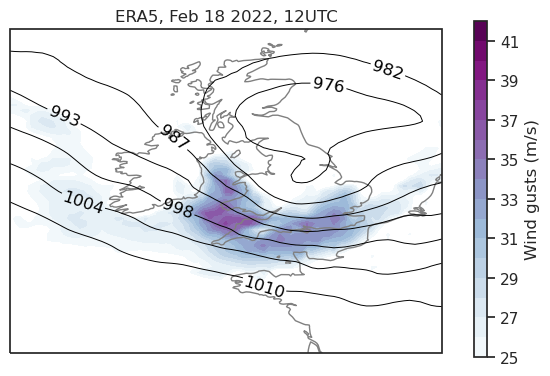

In [71]:
projection = ccrs.PlateCarree()
p_max = 1010
p_min = 960

fg10_min = 25
fg10_max = 42

fg10_vals = era_feb18.fg10.values[:,:]
p_vals = era_feb18.msl.values[:,:]/100
longitude = era_feb18.longitude.values
latitude = era_feb18.latitude.values

# figure and map setup
fig = plt.figure(1)
ax = plt.subplot(111, projection = projection)
ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey')

# isobars as contours
clevs_p = np.linspace(p_min, p_max, 10)
cs = ax.contour(longitude, latitude, p_vals, clevs_p, colors='black',
                transform=projection, linewidths = 0.7)
plt.clabel(cs, fmt='%d')

# fg10 as shading
clevs_fg10 = np.linspace(fg10_min, fg10_max, 18)
cf = ax.contourf(longitude, latitude, fg10_vals, clevs_fg10, cmap=plt.cm.BuPu,
                    transform=projection)

ax.set_title("ERA5, Feb 18 2022, 12UTC")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(cf, cax=cbar_ax, label='Wind gusts (m/s)')